<a href="https://colab.research.google.com/github/mattreiso/Clusteriza-o-aplicada/blob/main/Aplica%C3%A7%C3%A3o_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ONG

Uma ONG humanitária internacional está empenhada em combater a pobreza e fornecer às pessoas de países atrasados amenidades básicas e alívio durante desastres e calamidades naturais. De vez em quando, ela executa muitos projetos operacionais, juntamente com ações de advocacy para aumentar a conscientização, bem como para fins de financiamento.

Após os recentes programas de financiamento, eles conseguiram arrecadar cerca de US$ 10 milhões. Agora, o CEO da ONG precisa decidir como usar esse dinheiro de forma estratégica e eficaz. As questões significativas que surgem ao tomar essa decisão estão relacionadas principalmente à escolha dos países que mais precisam de ajuda.

E é aí que entramos como cientistas de dados. Nosso trabalho é categorizar os países usando alguns fatores socioeconômicos e de saúde que determinam o desenvolvimento geral do país. Em seguida, precisamos sugerir os países nos quais o CEO mais precisa se concentrar.


O dataset possui as seguintes colunas:

country: nome do país

child_mort: taxa de mortalidade infantil

exports:taxa de exportação de bens e serviços

health: total gasto com saúde

imports: importação de bens e serviços

Income: renda per capita

Inflation: indice de inflação

life_expec: expectativa de vida

total_fer: taxa de fecundidade (estimativa da quantidade de filhos que uma mulher teria ao longo de sua vida reprodutiva)

gdpp: produção economica de um país (PIB)


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features import PCA

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
country = pd.read_csv('/content/drive/MyDrive/Colab/country.csv')

# Entender primeiro como se organiza o dataset

In [4]:
country.shape

(167, 10)

In [5]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
country.sort_values(by = 'gdpp', ascending = False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.00,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.70,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.00,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.30,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.50,11.40,43.6,44000,3.220,79.5,1.87,58000
...,...,...,...,...,...,...,...,...,...,...
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327


In [8]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


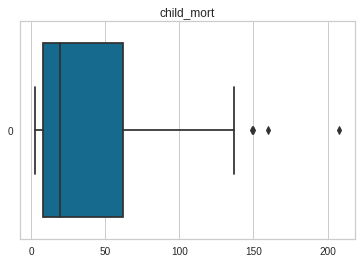

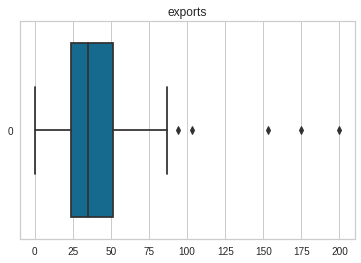

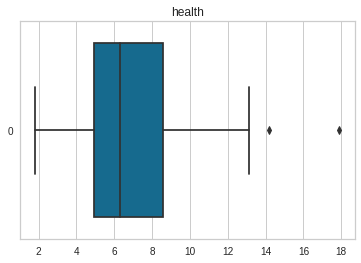

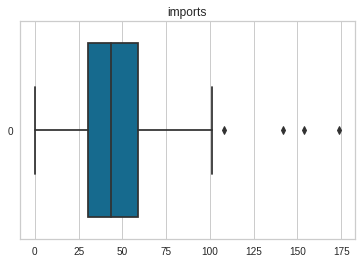

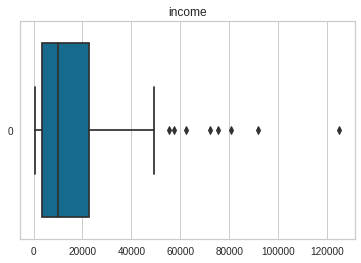

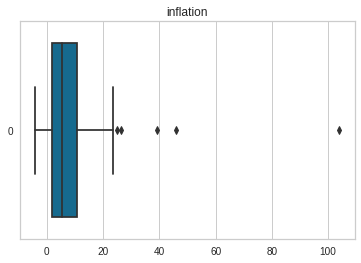

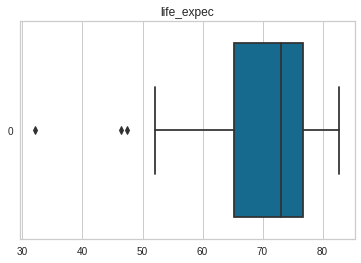

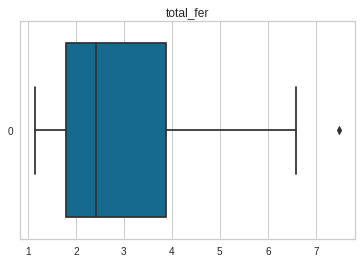

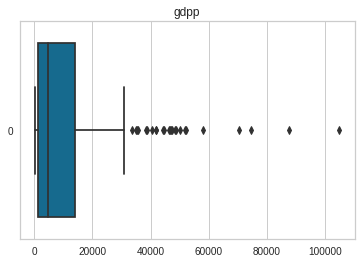

In [10]:
#entendendo a distribuição e escala de cada coluna
for col in country.columns[1:]:
  sns.boxplot(data=country[col], orient='h')
  plt.title(col)
  plt.show()

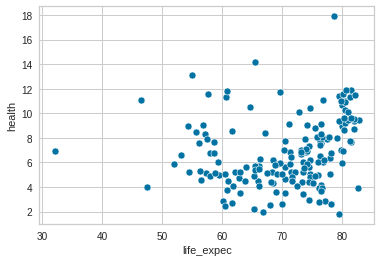

In [11]:
# Pelos meus estudos como engenheiro sanitarista, acredito que espectativa de vida tenha correlação direta com investimento em saude
#teste
sns.scatterplot(x='life_expec', y='health', data=country)
plt.show()

Aparentemente não tanto como meus professores falavam hahahaha

### Clusterizando

In [12]:
#separar as colunas que me serão interessantes para definir os clusters. Nome é irrelevante agora
countries_sel = country.iloc[:, 1:]
countries_sel

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [13]:
# não esquecer de normalizar os dados uma vez que as escalas são completamente diferentes.
scaler = StandardScaler()

In [14]:
countries_scaled = scaler.fit_transform(countries_sel)
countries_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [15]:
countries_scaled = pd.DataFrame(countries_scaled, columns=countries_sel.columns)
countries_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [16]:
#fazendo um gráfico de cotovelos para encontrar as melhores opções de clusters

def elbow(values):
  wcss=[]
  for i in range(2,12):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)
  plt.plot(range(2,12), wcss)
  plt.title('Elbow')
  plt.xlabel('Número de Clusters')
  plt.ylabel('WCSS')
  plt.show()

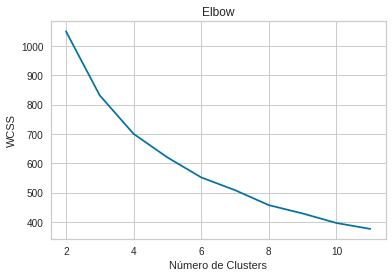

In [17]:
elbow(countries_scaled)

### Utilizando yellowbricks para melhor vizualização dos cotovelos

In [18]:
def elbow_yellow(values):
  kmeans=KMeans()
  visualizer = KElbowVisualizer(kmeans, k=(2,12))
  visualizer.fit(values)
  visualizer.show()

In [19]:
#sugestão do anderson utilizar a metrica de Harabasz tambem
def elbow_ch(values):
  kmeans = KMeans()
  visualizer = KElbowVisualizer(kmeans, k=(2,12),metric = 'calinski_harabasz')
  visualizer.fit(values)
  visualizer.show()

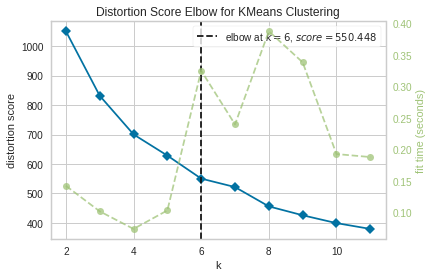

In [20]:
elbow_yellow(countries_scaled)
#countries_scaled é o DF normalizado

Indicação de 6 clustes

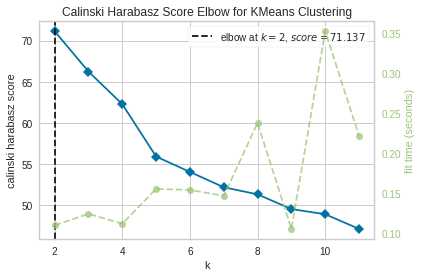

In [21]:
elbow_ch(countries_scaled)

Indicação de 2 clusters

In [22]:
# ja que tivemos mais de uma opção de indicação, é indicado utilizar o metodo da silhueta como tira teima
def sillhouette(values, k):
  kmeans = KMeans(k)
  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(values)
  visualizer.show()


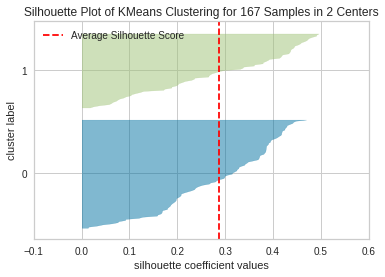

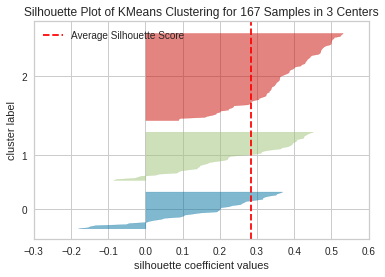

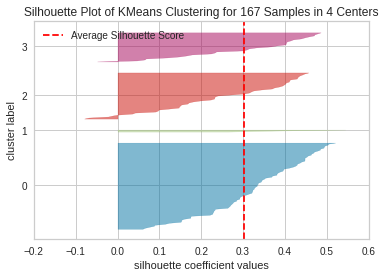

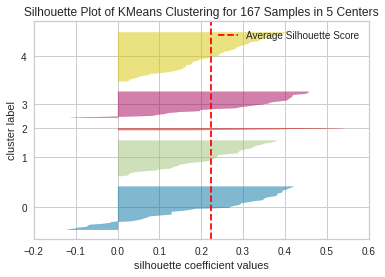

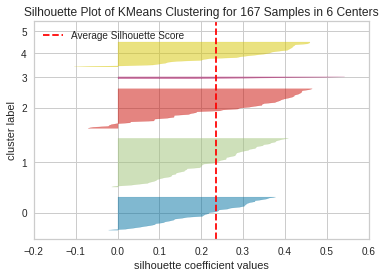

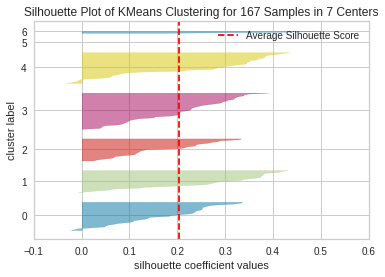

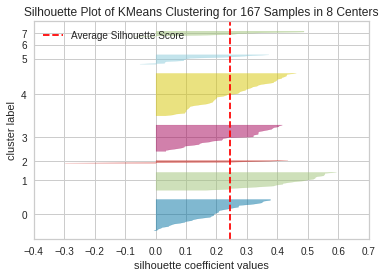

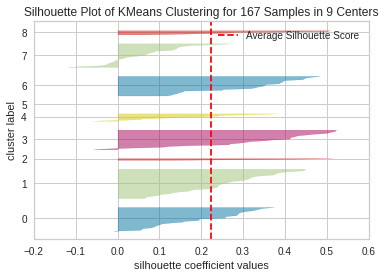

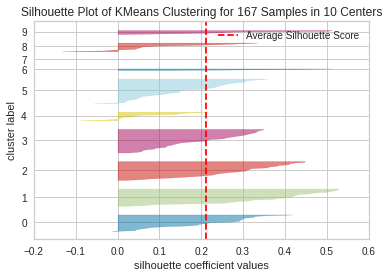

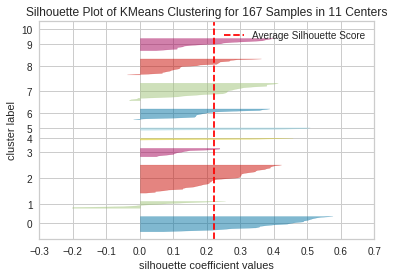

In [23]:
for i in range(2,12):
  sillhouette(countries_scaled, i)

Com o metodo das silhuetas é indicado utilizar 2 ou 3 clusters, mas sera que vou conseguir selkecionar os paises mais vulneraveis apenas com essa quantidade?

In [24]:
countries_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


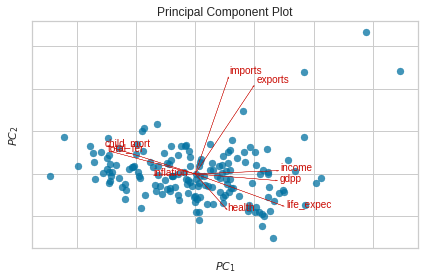

In [25]:
visualizer = PCA(proj_features=True)
visualizer.fit_transform(countries_scaled)
visualizer.show()

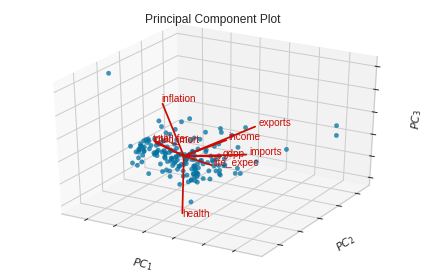

In [26]:
visualizer = PCA(proj_features=True, projection=3)
visualizer.fit_transform(countries_scaled)
visualizer.show()
# em 3 dimensões fica:

In [29]:
#seguindo essa ideia, agora é preciso decompor os principais componentes com o PCA do sickt learn
from sklearn.decomposition import PCA

In [30]:
pca = PCA()
pca.fit(countries_scaled)
features = range(pca.n_components_)

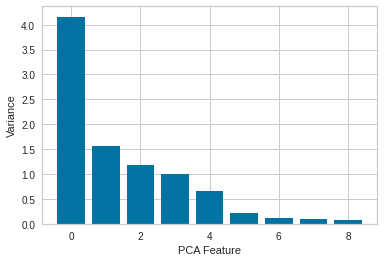

In [31]:
#observar onde a variação reduz, ouys eja, quanto de variancia eu consigo explicar em cada n componentes. nesse caso após 4 comecei a perder informação
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.show()

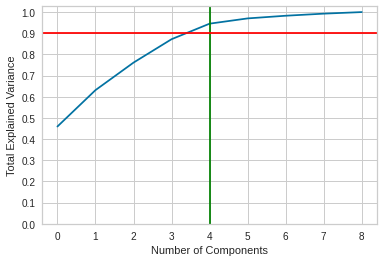

In [34]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(4, c='green')
plt.axhline(0.9, c='red')
plt.show()
#linha azul mostra a importrancia do numero de features (ideia do pareto) se utilizarmos n = 3, linha azul ficara abaixo do intercepto, por isso usaremos 4

In [35]:
pca = PCA(n_components=4)
countries_pca = pca.fit_transform(countries_scaled)
countries_pca


array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01,
         1.00525464e+00],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01,
        -1.16105859e+00],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00,
        -8.68114503e-01],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00,
         8.39625014e-01],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01,
        -8.47062687e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01,
        -3.69668667e-02],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01,
        -1.46626576e+00],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01,
         1.10503778e+00],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01,
         1.20544210e+00],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01,
        -4.38772983e-01],
       [ 1.26874386e+00, -6.56588363e-01, -4.88097616e-01,
         5.56335553e-02],
       [ 1.67099640e+00,  5.61162493e-01,  9.91258303e-01,
      

In [36]:
#separar um dataframe com os 4 PCA's
df_countries_pca = pd.DataFrame(countries_pca, columns=(['PC0', 'PC1', 'PC2', 'PC3']))
df_countries_pca

,PC0,PC1,PC2,PC3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


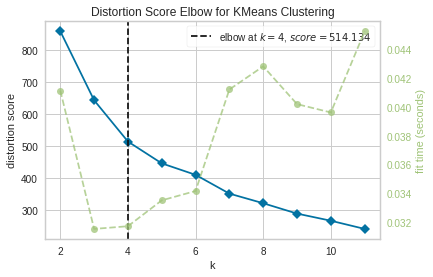

In [39]:
#Testando os cotovelos agora nos PCA's
elbow_yellow(countries_pca)

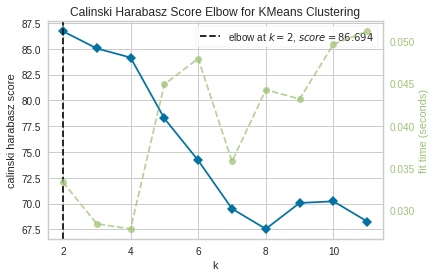

In [41]:
elbow_ch(countries_pca)

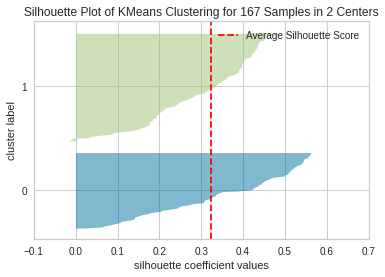

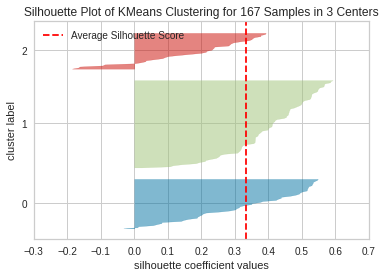

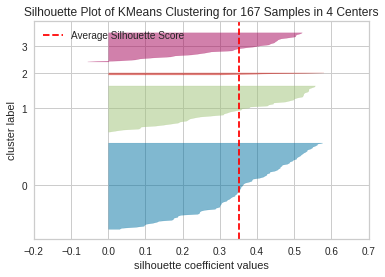

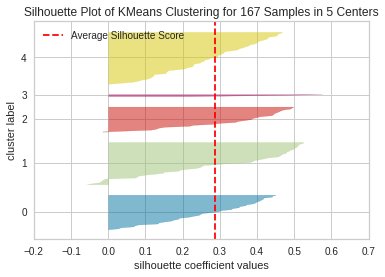

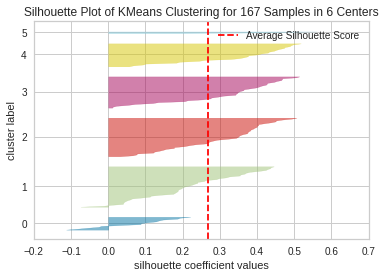

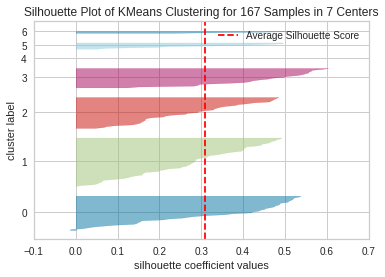

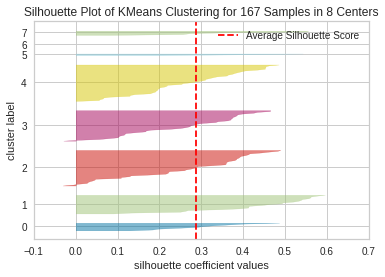

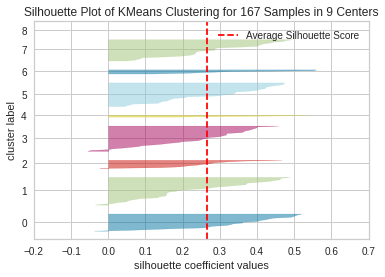

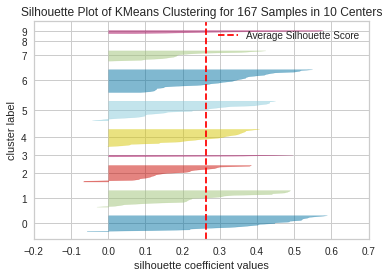

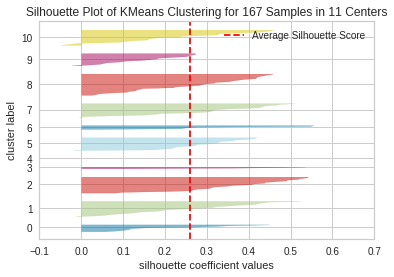

In [42]:
for i in range(2,12):
  sillhouette(countries_pca, i)

In [53]:
#silhueta indicando que 3 é melhor
kmeans = KMeans(n_clusters=3)
yKmeans = kmeans.fit_predict(countries_pca)

In [54]:
yKmeans

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [56]:
country['cluster'] = yKmeans

In [57]:
#agora tem uma coluna que mostra o cluster em que o país se encontra
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


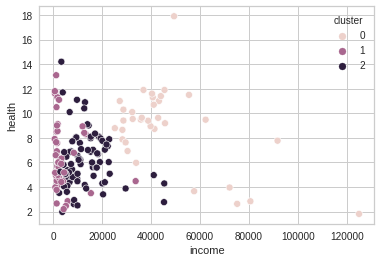

In [58]:
sns.scatterplot(x='income', y='health', data=country, hue='cluster')
plt.show()

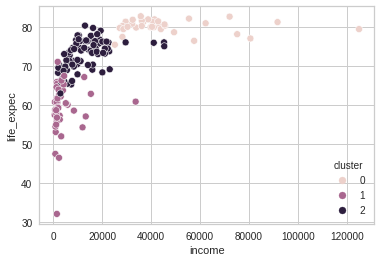

In [59]:
sns.scatterplot(x='income', y='life_expec', data=country, hue='cluster')
plt.show()

In [60]:
#teste com 4
kmeans = KMeans(n_clusters=4)
yKmeans = kmeans.fit_predict(countries_pca)

In [61]:
country['cluster'] = yKmeans

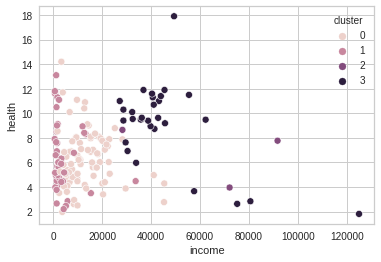

In [62]:
sns.scatterplot(x='income', y='health', data=country, hue='cluster')
plt.show()

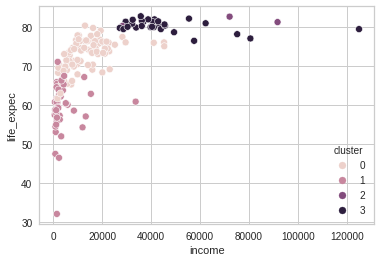

In [63]:
sns.scatterplot(x='income', y='life_expec', data=country, hue='cluster')
plt.show()

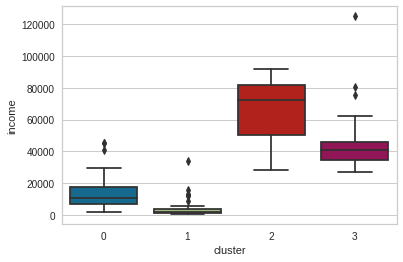

In [64]:
sns.boxplot(x='cluster', y='income', data=country)
plt.show()
#income por cluster

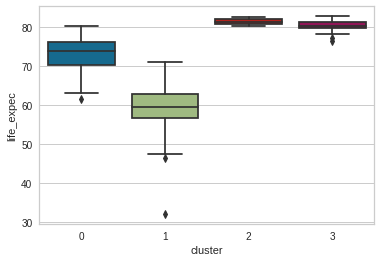

In [65]:
#expectativa de vida por cluster
sns.boxplot(x='cluster', y='life_expec', data=country)
plt.show()

In [67]:
country[country['cluster']==1]
#paises com pior income e expectativa de vida

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1


In [68]:
#analisar os conjuntos hierarquicos
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [71]:
#plt.figure(figsize=(25,8))
#dend = sch.dendrogram(sch.linkage(countries_pca, method='single'))
#plt.show()
#metodo single nao é tao interessante nessa caso ja que a aglomeração é somente pela proximidade dos pontinhos

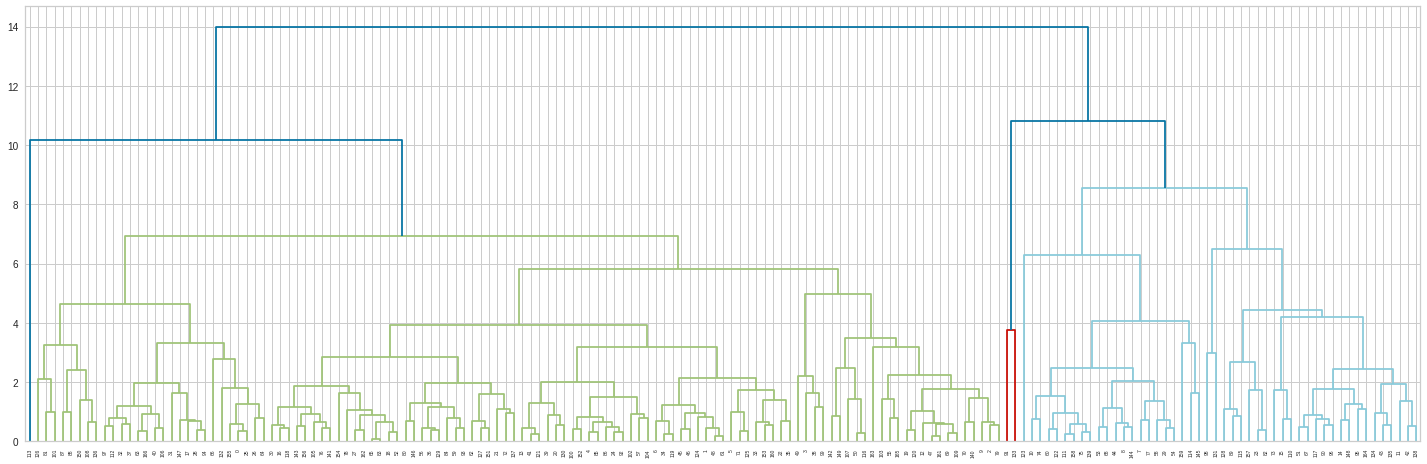

In [73]:
plt.figure(figsize=(25,8))
dend = sch.dendrogram(sch.linkage(countries_pca, method='complete'))
plt.show()

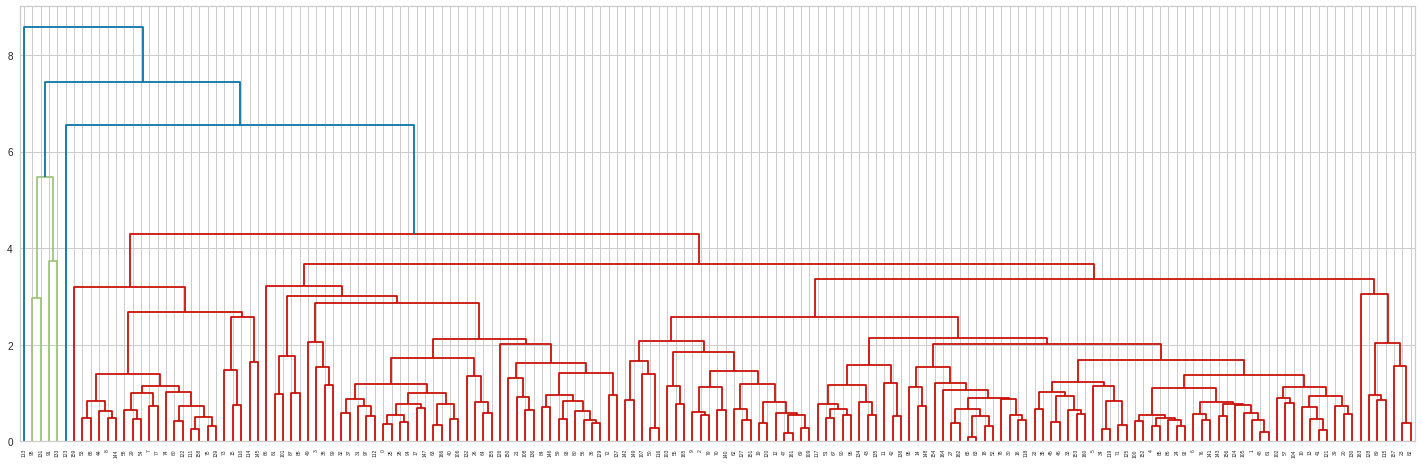

In [74]:
plt.figure(figsize=(25,8))
dend = sch.dendrogram(sch.linkage(countries_pca, method='average'))
plt.show()
#Esse método utiliza a média das distancias

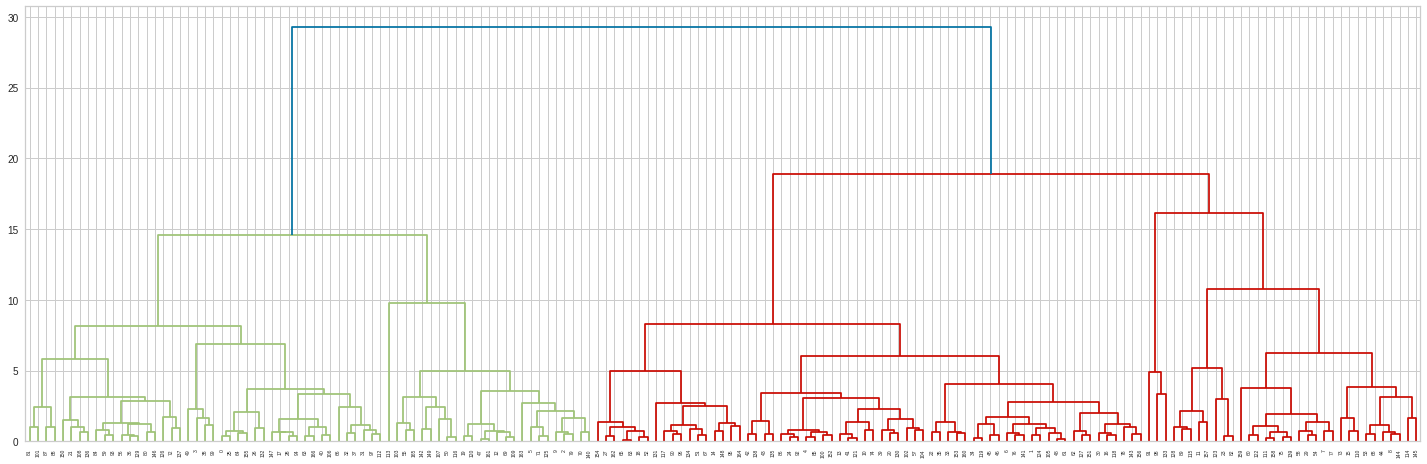

In [75]:
plt.figure(figsize=(25,8))
dend = sch.dendrogram(sch.linkage(countries_pca, method='ward'))
plt.show()

#METODO MAIS UTILIZADO. CONSIDERA O DESVIO serve como um metodo de cotovelo. a maior linha euclidiana nesse caso é a azul da esquerna (indicando 2 clusters). Contudo nao fica interessante para nosso problema, logo, manteremos os primeiros clusters (centroides) do que esses (proximidade)